In [ ]:
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.ExcelFile('/content/drive/My Drive/clean bars data 1.xlsx')

In [ ]:
bar_reviews = pd.read_excel(df, 'clean bars data 1') #WE COULD CLEAN THE DATA AFTERWARDS
categories_df = pd.read_excel(df, 'Categories Key Words')

In [ ]:
bar_reviews = bar_reviews.drop(['Unnamed: 0','google_id', 'place_id', 'location_link', 
                  'reviews_link', 'reviews_per_score', 'avg_rating', 'review_rating',
                  'author_link', 'review_id', 'author_id', 'author_name', 'author_image', 
                  'review_img_url', 'review_link',
                  'review_timestamp', 'review_datetime_utc', 'review_likes', 'reviews_id',
                  'Latitude', 'Longitude' ], axis=1)

In [ ]:
#make every word lower case
bar_reviews['review_text'] = bar_reviews['review_text'].str.lower()

In [ ]:
bar_reviews.head()

,name,review_text
0,Vig Bar,chill vibe. either an all-day or one-and-done ...
1,Vig Bar,what a party. cool cocktail bar during the day...
2,Vig Bar,"after contacting 25+ different places, i chose..."
3,Vig Bar,chill spot for drinks. the pizza looked good b...
4,Vig Bar,i was able to host a small holiday party event...


In [ ]:
categories_df.head()


,Price,Ambience/Vibes,Food/Drinks/Menu,Cleanliness,Service/Staff
0,price,ambience,food,cleanliness,waiters
1,money,vibes,drinks,clean,waitresses
2,credit,environment,menu,dirty,servers
3,cash,lighting,cook,sticky,hosts
4,card,music,chef,grimey,hostesses


In [ ]:
#categories_df.columns : Index(['Price', 'Ambience/Vibes', 'Food/Drinks/Menu', 'Cleaniness', 'Service/Staff'], dtype='object')

In [ ]:
category_dic = {} #make a dictionary of word lists for each category
for category in categories_df.columns:
 category_dic[category] = set(categories_df[category].to_list())

In [ ]:
print(category_dic.keys())

dict_keys(['Price', 'Ambience/Vibes', 'Food/Drinks/Menu', 'Cleanliness', 'Service/Staff'])


In [ ]:
categories_column = []

for review in bar_reviews['review_text']:
  designated_categories = [] #the categories the review belong to

  review = str(review).lower() #make the review case insensitive (because all the words in the category word lists are lower cased)
  
  review_words = review.split() #make a list of every word in the review

  for category in category_dic.keys():
    
    i = 0
    while i in range(0,len(review_words)):                   #iterate through every word in the review
      if review_words[i] in category_dic.get(category):      #if the review has a word from the category word list, designated the category to the review
          designated_categories.append(category)
          break
      else: 
        i+=1

  categories_column.append(", ".join(designated_categories))


In [ ]:
#What if the word contains '' "" ! , . etc. Do we need to just use Regex?

In [ ]:
bar_reviews['review_categories'] = categories_column
bar_reviews.head()
bar_reviews['review_text']

0       chill vibe. either an all-day or one-and-done ...
1       what a party. cool cocktail bar during the day...
2       after contacting 25+ different places, i chose...
3       chill spot for drinks. the pizza looked good b...
4       i was able to host a small holiday party event...
                              ...                        
3204    great beer selection but the food is not good....
3205    the keg room is a great spot to go in midtown!...
3206    nice ! very nice.good food and amazing choice ...
3207    great ambience. service was attentive at the b...
3208    excellent beer! i actually thought ilost my wa...
Name: review_text, Length: 3209, dtype: object

In [ ]:
bar_list = set()
for i in range(0,len(bar_reviews.index)):
  bar_list.add(bar_reviews.iloc[i]['name'])
bar_list


{'Albion Bar',
 'Ampersand',
 'Attaboy',
 'BAR GOTO',
 'Blaggards Pub',
 'Brandy Library',
 'Bubo',
 'Cask Bar & Kitchen',
 'District Tap House',
 'Fig. 19',
 'Flannerys Bar',
 "Garfunkel's",
 'Gold Bear',
 'Goodnight Sonny',
 'Holiday Cocktail Lounge',
 'Juniper Bar',
 'Local',
 'Nancy Whiskey Pub',
 'Nassau Bar',
 'Patriot Saloon',
 'RPM Bar',
 'Raines Law Room Chelsea',
 'STATE Grill and Bar',
 'Sweet & Vicious',
 'The Half Pint',
 'The Junction',
 'The Keg Room',
 'The Skinny Bar and Lounge',
 'The Up & Up',
 'Vig Bar',
 'Whiskey Tavern'}

In [ ]:
for bar in bar_list:
  print ("***"+bar+"***")
  reviews_df = pd.DataFrame(bar_reviews[bar_reviews['name']==bar])
  for category in category_dic.keys():
    print('-'+category+'-')
    display(reviews_df[reviews_df['review_categories'].str.contains(category)]['review_text'])




In [ ]:
#Reference: https://subscription.packtpub.com/book/data/9781838987312/2/ch02lvl1sec13/splitting-sentences-into-clauses

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
#defining a function to find the root token of the sentence
#root token: usually the main verb of the sentence or the verb of the independent clause
def find_root_of_sentence(doc):
  root_token = None
  for token in doc:
    if (token.dep_ == "ROOT"):
      root_token = token
  return root_token

In [ ]:
#defining a function to find the other verbs in the sentnece
def find_other_verbs(doc, root_token):
  other_verbs = []
  for token in doc:
    ancestors = list(token.ancestors)
    if token.pos_ in ("VERB","AUX") and len(ancestors) == 1 and ancestors[0] == root_token:
      other_verbs.append(token)
  return other_verbs

In [ ]:
#defining a function to find the token spans for each verb
def get_clause_token_span_for_verb(verb, doc, all_verbs):
    first_token_index = len(doc)
    last_token_index = 0
    this_verb_children = list(verb.children)
    for child in this_verb_children:
        if child not in all_verbs:
            if child.i < first_token_index:
                first_token_index = child.i
            if child.i > last_token_index:
                last_token_index = child.i
    return first_token_index, last_token_index

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
review = bar_reviews['review_text'].loc[15]
review = str(review).lower()
sentences = sent_tokenize(review)
sentence = sentences[2]
print(sentence)
doc = nlp(sentence)
root_token = find_root_of_sentence(doc)
print(root_token)
other_verbs = find_other_verbs(doc,root_token)
print(other_verbs)
token_spans = []
all_verbs = [root_token] + other_verbs
all_verbs = [x for x in all_verbs if x != None]
print(all_verbs)
for other_verb in all_verbs:
    first_token_index, last_token_index = get_clause_token_span_for_verb(other_verb, doc, all_verbs)
    token_spans.append((first_token_index,last_token_index))
print(token_spans)
sentence_clauses = []
for token_span in token_spans:
  start = token_span[0]
  end = token_span[1]
  if start < end:
    clause = doc[start:end]
    sentence_clauses.append(clause)
sentence_clauses


owner happened to be in during our visit, and he and his companion were also incredibly friendly.
happened
[be, were]
[happened, be, were]
[(0, 9), (2, 5), (10, 18)]


[owner happened to be in during our visit,,
 to be in,
 he and his companion were also incredibly friendly]

In [ ]:
for review in bar_reviews['review_text']:
  review = str(review).lower()
  sentences = sent_tokenize(review)
  for sentence in sentences:
    doc = nlp(sentence)
    root_token = find_root_of_sentence(doc)
    other_verbs = find_other_verbs(doc,root_token)
    token_spans = []
    all_verbs = [root_token] + other_verbs
    all_verbs = [x for x in all_verbs if x != None]
    for other_verb in all_verbs:
      first_token_index, last_token_index = get_clause_token_span_for_verb(other_verb, doc, all_verbs)
      token_spans.append((first_token_index,last_token_index))
    sentence_clauses = []
    for token_span in token_spans:
      start = token_span[0]
      end = token_span[1]
      if start < end:
        clause = doc[start:end]
        sentence_clauses.append(clause)
    sentence_clauses = sorted(sentence_clauses, key = lambda tup: tup[0])
    clauses_text = [clause.text for clause in sentence_clauses]
    print(clauses_text)
    

In [ ]:
for bar in bar_list:
  print ("***"+bar+"***")
  reviews_df = pd.DataFrame(bar_reviews[bar_reviews['name']==bar]) #here we got every review for this one bar
  for category in category_dic.keys():
    print('-'+category+'-')
    display(reviews_df[reviews_df['review_categories'].str.contains(category)]['review_text']) #selecting only the reviews that belong to a certain category



In [ ]:
test_reviews_df = pd.DataFrame(bar_reviews[bar_reviews['name']=='Vig Bar'])
test_ambience_df = pd.DataFrame(reviews_df[reviews_df['review_categories'].str.contains('Ambience/Vibes')]['review_text'])
test_ambience_df

,review_text
2210,probably not a bar for everyone but it is abso...
2211,great service and cool place to go when in the...
2216,great drive sports bar. has jello shots and a ...
2219,"the patriot saloon is a no frills, no nonsense..."
2221,very cool bar. cozy and super ambient. beverag...
2228,"we had a great time. the crowd was lively, som..."
2231,great spot for a pint and bar bites during lun...
2237,best place to get a drink in downtown manhatta...
2238,"if you like old music and good beer price, thi..."
2239,the patriot is always a great time!! the drink...


In [ ]:
test_clause_column = []

for review in test_ambience_df['review_text']:
  review_clauses = []
  review = str(review).lower()
  sentences = sent_tokenize(review)
  for sentence in sentences:
    doc = nlp(sentence)
    root_token = find_root_of_sentence(doc)
    other_verbs = find_other_verbs(doc,root_token)
    token_spans = []
    all_verbs = [root_token] + other_verbs
    all_verbs = [x for x in all_verbs if x != None]
    for other_verb in all_verbs:
      first_token_index, last_token_index = get_clause_token_span_for_verb(other_verb, doc, all_verbs)
      token_spans.append((first_token_index,last_token_index))
    sentence_clauses = []
    for token_span in token_spans:
      start = token_span[0]
      end = token_span[1]
      if start < end:
        clause = doc[start:end]
        sentence_clauses.append(clause)
        sentence_clauses = sorted(sentence_clauses, key = lambda tup: tup[0])
        for clause in sentence_clauses:
          clause_words = clause.text.split(' ')

          i = 0
          while i in range(0,len(clause_words)):                   #iterate through every word in the review
            if clause_words[i] in category_dic.get('Ambience/Vibes'):      #if the review has a word from the category word list, designated the category to the review
              review_clauses.append(clause.text)
              break
            else: 
              i+=1
  test_clause_column.append(" ".join(review_clauses))

    

In [ ]:
test_ambience_df['clauses'] = test_clause_column
test_ambience_df.head()

,review_text,clauses
2210,probably not a bar for everyone but it is abso...,", slightly grungy environment with an old-scho..."
2211,great service and cool place to go when in the...,
2216,great drive sports bar. has jello shots and a ...,
2219,"the patriot saloon is a no frills, no nonsense...",evidence that this place is rowdy on the weeke...
2221,very cool bar. cozy and super ambient. beverag...,music comes from the jukebox


In [ ]:
# function to calculate polarity
from textblob import TextBlob
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

In [ ]:
# Score for Vig Bar on the category of Ambience/Vibes, averaged across all Vig Bar reviews that mentioned Ambience
total = 0
for clause in test_ambience_df['clauses']:
  total += getPolarity(clause)

average = total / len(test_ambience_df['clauses'])

print(average)  

0.19936167227833898


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud

In [ ]:
test_clause_column_str = str(test_clause_column)

In [ ]:
def Word_Cloud_Function(parameter):    
    word_cloud = WordCloud(collocations = False, background_color = 'white', colormap='tab10').generate(parameter)
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

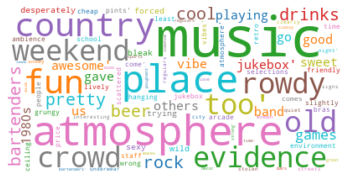

In [ ]:
#AMBIENCE WORD CLOUD FOR VIG BAR
Word_Cloud_Function(test_clause_column_str)

# **FLASK**

In [ ]:
!pip install flask-ngrok

!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

/drive/ngrok-ssh
--2022-04-29 21:31:10--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  6.07MB/s    in 2.2s    

2022-04-29 21:31:13 (6.07 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip


In [ ]:
!/ngrok authtoken 274xoL37wyjI8nLvt7mBtsjVKND_63KZvnYdTYfvTH9WErr6A

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
test_reviews_df.columns

Index(['name', 'review_text', 'review_categories'], dtype='object')

In [ ]:
#remove non-alphanumeric characters 
pattern = re.compile('\W')

for x in range(0, len(test_reviews_df['review_text'])):
  test_reviews_df['review_text'][x] = re.sub(pattern, ' ', str(test_reviews_df['review_text'][x]))

In [ ]:
vig_reviews_list = []
for review in test_reviews_df['review_text']:
  vig_reviews_list.append(review)

In [ ]:
test_vig_ambience_df = pd.DataFrame(test_reviews_df[test_reviews_df['review_categories'].str.contains('Ambience/Vibes')]['review_text'])

In [ ]:
test_vig_ambience_df 

,review_text
1,what a party cool cocktail bar during the day...
2,after contacting 25 different places i chose...
4,i was able to host a small holiday party event...
7,the solo bartender is a machine she can take ...
11,excellent fixture in the neighborhood with a y...
16,this is a cool place just off the bowery the ...
21,the vig is a l shaped cool lounge bar with low...
24,one of my favorite places to go to because of ...
25,great bar and one of my favourites in the hood...
28,great atmosphere great service the bartender...


In [ ]:
from IPython.display import HTML
from flask import Flask, request, render_template, session, redirect
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def intro():
  return render_template('intro.html', mylist=bar_list)
  
@app.route('/<bar_name>')
def bar(bar_name):
  bar_name = re.sub('_', ' ', bar_name) #replacing underscore in name with a space
  #
  test_reviews_df = pd.DataFrame(bar_reviews[bar_reviews['name']==bar_name])
  reviews_list = []
  for review in test_reviews_df['review_text']:
    reviews_list.append(review)
  #
  return render_template('bar.html', bar_name=bar_name, mylist=reviews_list) 

@app.route('/<bar_name>/<category_name>')
def category(bar_name, category_name):
  bar_name = re.sub('_', ' ', bar_name) #replacing underscore in name with a space
  #  
  test_reviews_df = pd.DataFrame(bar_reviews[bar_reviews['name']==bar_name])
  test_category_df = pd.DataFrame(test_reviews_df[test_reviews_df['review_categories'].str.contains(category_name)]['review_text'])
  reviews_list = []
  for review in test_category_df['review_text']:
    reviews_list.append(review)  
  #
  return render_template('category.html', bar_name=bar_name, category_name=category_name, mylist=reviews_list) 

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6f37-34-80-226-133.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Apr/2022 21:46:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:42] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:45] "GET /Vig_Bar HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:46] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:46] "GET /Vig_Bar HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:49] "GET /Vig_Bar/Price HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:50] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:46:50] "GET /Vig_Bar/Price HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:47:07] "GET /Vig_Bar HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:47:07] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:47:16] "GET /Vig_Bar/Ambience/Vibes HTTP/1.1" 404 -
127.0.0.1 - - [29/Apr/2022 21:47:16] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [29/Apr/2022 21:47:17]